In [2]:
import json
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
_results = json.load(open('./results.json'))
benchmarks = [bench for bench in _results if bench['is_completed_successfully'] is not None]    # Ignored benchmarks with issues
print("Total Valid Benchmarks: ", len(benchmarks))
print("Benchmark keys: ", benchmarks[0].keys())

Total Valid Benchmarks:  192
Benchmark keys:  dict_keys(['benchmark_name', 'input_vars', 'output_vars', 'ltl_formula', 'is_completed_successfully', 'total_duration', 'was_spec_constructed', 'spec_construction_duration', 'dependent_vars', 'tested_vars'])


In [4]:
constructed_benchmark = [bench for bench in benchmarks if bench['was_spec_constructed'] == 'true']
completed_benchmark = [bench for bench in constructed_benchmark if bench['is_completed_successfully'] == 'true']
incompleted_benchmark = [bench for bench in constructed_benchmark if bench['is_completed_successfully'] == 'false']
incomplete_with_tested_vars_benchmarks = [bench for bench in incompleted_benchmark if len(bench['tested_vars']) > 0]

In [5]:
print("Total Benchmarks: ", len(benchmarks))
print("Total Benchmarks With Spec Constructed: ", len(constructed_benchmark))
print("Total Completed Benchmarks: ", len(completed_benchmark))
print("Total Incompleted benchmark: ", len(incompleted_benchmark))
print("Total Incompleted benchmark with at least one tested vars: ", len(incomplete_with_tested_vars_benchmarks))

Total Benchmarks:  192
Total Benchmarks With Spec Constructed:  168
Total Completed Benchmarks:  88
Total Incompleted benchmark:  80
Total Incompleted benchmark with at least one tested vars:  8


## Dependent Variables

In [6]:
benchmarks_with_deps = [bench for bench in benchmarks if len(bench['dependent_vars']) > 0]
completed_benchmark_with_deps = [bench for bench in benchmarks_with_deps if bench['is_completed_successfully'] == 'true']
incompleted_benchmark_with_deps = [bench for bench in benchmarks_with_deps if bench['is_completed_successfully'] == 'false']

In [7]:
print("Benchmark with dependents: ", len(benchmarks_with_deps))
print("Completed Benchmark with Dependents: ", len(completed_benchmark_with_deps))
print("Incompleted benchmark with dependents: ", len(incompleted_benchmark_with_deps))

Benchmark with dependents:  47
Completed Benchmark with Dependents:  47
Incompleted benchmark with dependents:  0


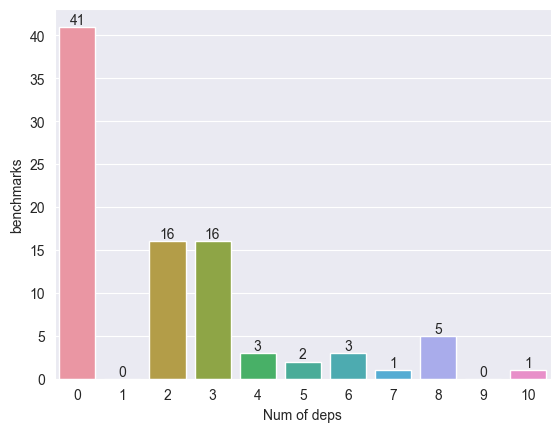

In [8]:
benchmark_deps = [ len(bench['dependent_vars']) for bench in completed_benchmark ]
deps_agg = np.bincount(benchmark_deps)
total_deps_counter = pd.DataFrame.from_records([
    {"Num of deps": x, "benchmarks": y }
    for x, y in zip(np.arange(len(deps_agg)), deps_agg)
])
ax = sns.barplot(data=total_deps_counter, x='Num of deps', y='benchmarks');
for i in ax.containers:
    ax.bar_label(i,)